In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/obesity-prediction/Obesity prediction.csv


In [2]:
df = pd.read_csv("/kaggle/input/obesity-prediction/Obesity prediction.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          2111 non-null   object 
 1   Age             2111 non-null   float64
 2   Height          2111 non-null   float64
 3   Weight          2111 non-null   float64
 4   family_history  2111 non-null   object 
 5   FAVC            2111 non-null   object 
 6   FCVC            2111 non-null   float64
 7   NCP             2111 non-null   float64
 8   CAEC            2111 non-null   object 
 9   SMOKE           2111 non-null   object 
 10  CH2O            2111 non-null   float64
 11  SCC             2111 non-null   object 
 12  FAF             2111 non-null   float64
 13  TUE             2111 non-null   float64
 14  CALC            2111 non-null   object 
 15  MTRANS          2111 non-null   object 
 16  Obesity         2111 non-null   object 
dtypes: float64(8), object(9)
memory u

In [4]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history', 'FAVC', 'FCVC',
       'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS',
       'Obesity'],
      dtype='object')

In [5]:
df.head()

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [6]:
df.isnull().sum().sort_values(ascending = True)

Gender            0
CALC              0
TUE               0
FAF               0
SCC               0
CH2O              0
SMOKE             0
MTRANS            0
CAEC              0
FCVC              0
FAVC              0
family_history    0
Weight            0
Height            0
Age               0
NCP               0
Obesity           0
dtype: int64

In [7]:
df.duplicated().sum()

24

In [8]:
df = df.drop_duplicates()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2087 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          2087 non-null   object 
 1   Age             2087 non-null   float64
 2   Height          2087 non-null   float64
 3   Weight          2087 non-null   float64
 4   family_history  2087 non-null   object 
 5   FAVC            2087 non-null   object 
 6   FCVC            2087 non-null   float64
 7   NCP             2087 non-null   float64
 8   CAEC            2087 non-null   object 
 9   SMOKE           2087 non-null   object 
 10  CH2O            2087 non-null   float64
 11  SCC             2087 non-null   object 
 12  FAF             2087 non-null   float64
 13  TUE             2087 non-null   float64
 14  CALC            2087 non-null   object 
 15  MTRANS          2087 non-null   object 
 16  Obesity         2087 non-null   object 
dtypes: float64(8), object(9)
memory usage:

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2087.0,24.353090,6.368801,14.00,19.915937,22.847618,26.000000,61.00
Height,2087.0,1.702674,0.093186,1.45,1.630178,1.701584,1.769491,1.98
Weight,2087.0,86.858730,26.190847,39.00,66.000000,83.101100,108.015907,173.00
FCVC,2087.0,2.421466,0.534737,1.00,2.000000,2.396265,3.000000,3.00
NCP,2087.0,2.701179,0.764614,1.00,2.697467,3.000000,3.000000,4.00
CH2O,2087.0,2.004749,0.608284,1.00,1.590922,2.000000,2.466193,3.00
FAF,2087.0,1.012812,0.853475,0.00,0.124505,1.000000,1.678102,3.00
TUE,2087.0,0.663035,0.608153,0.00,0.000000,0.630866,1.000000,2.00


In [11]:
df["Obesity"].value_counts()

Obesity
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_II    290
Normal_Weight          282
Overweight_Level_I     276
Insufficient_Weight    267
Name: count, dtype: int64

In [12]:
obesity_ranks = df["Obesity"].value_counts()

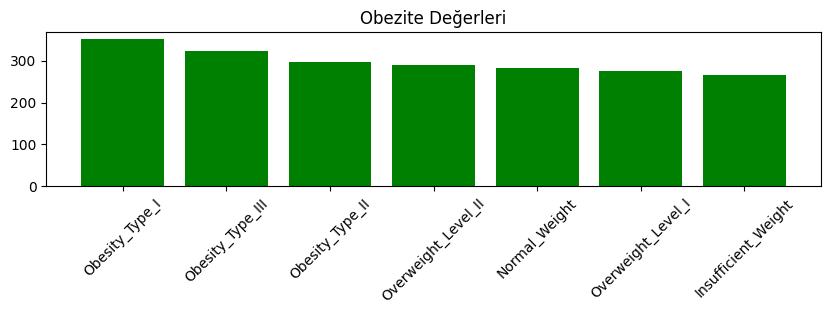

In [13]:
plt.figure(figsize=(10,2))
plt.bar(obesity_ranks.index, obesity_ranks.values, color="green")
plt.title("Obezite Değerleri")
plt.xticks(rotation=45)
plt.show()

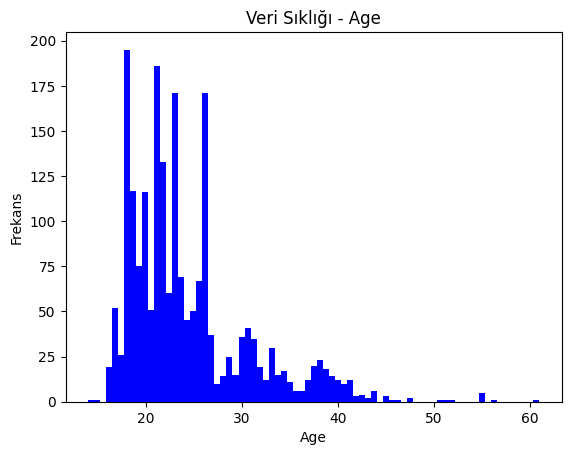

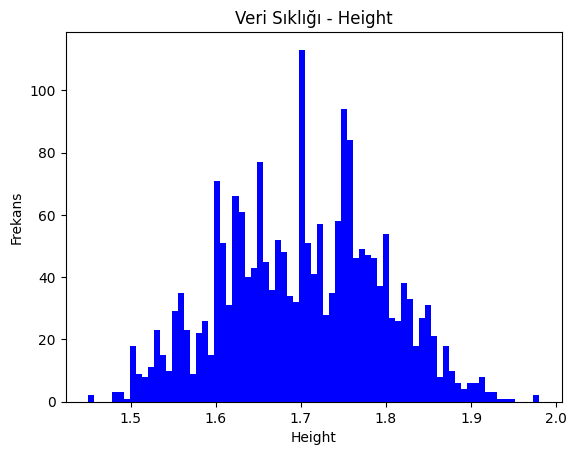

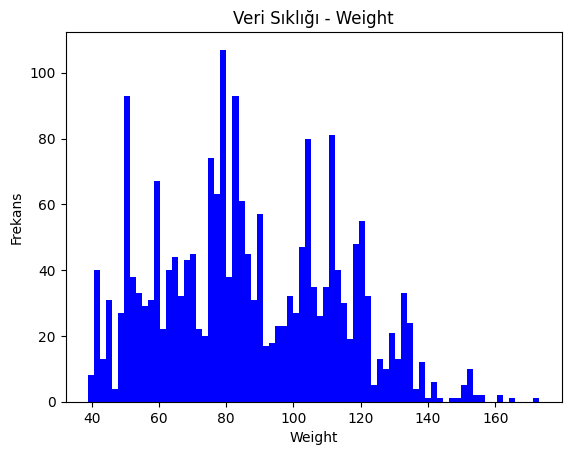

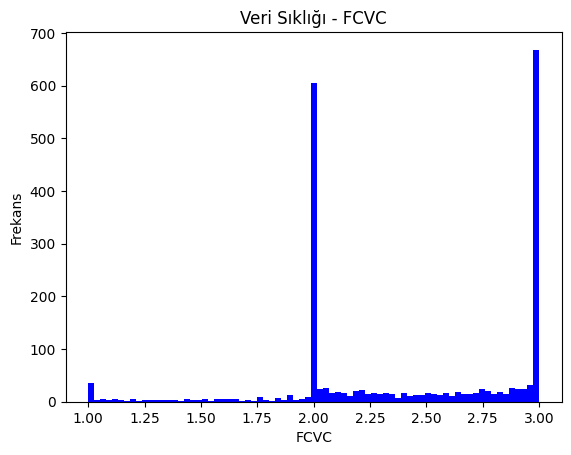

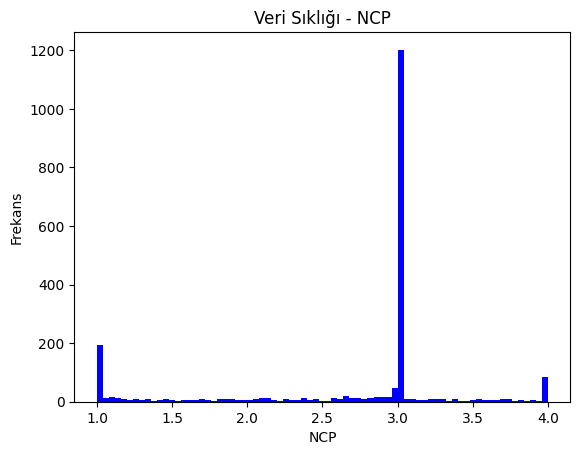

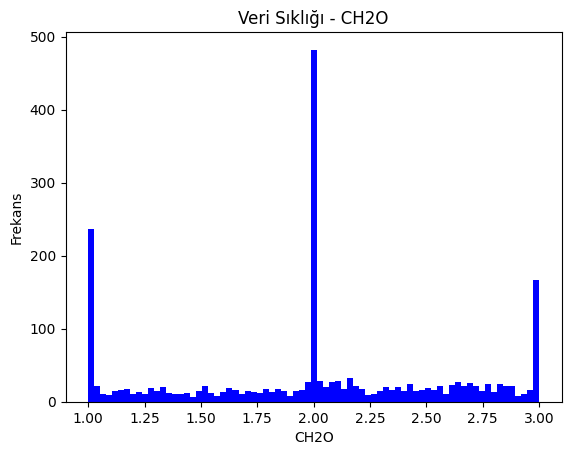

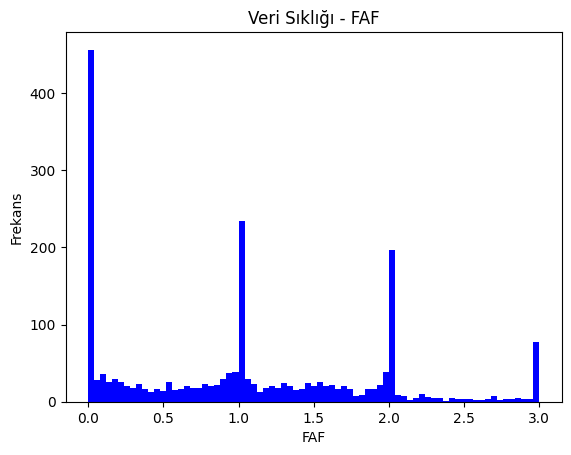

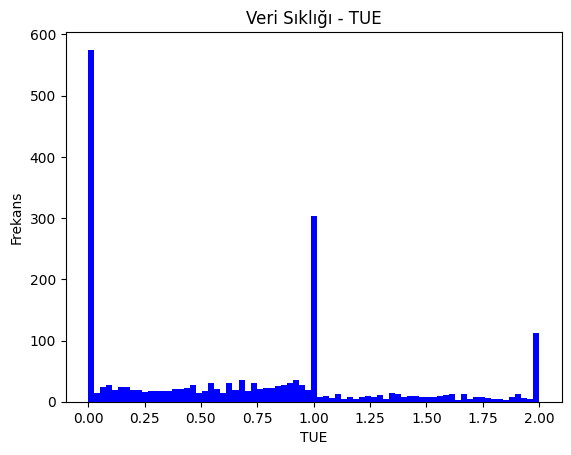

In [14]:
def plotHist(var):
    plt.figure()
    plt.hist(df[var], bins = 75, color = "blue")
    plt.xlabel(var)
    plt.ylabel("Frekans")
    plt.title("Veri Sıklığı - {}".format(var))
    plt.show()
    
numeric_cols = df.select_dtypes(include = ["float64"])
for i in numeric_cols:
    plotHist(i)

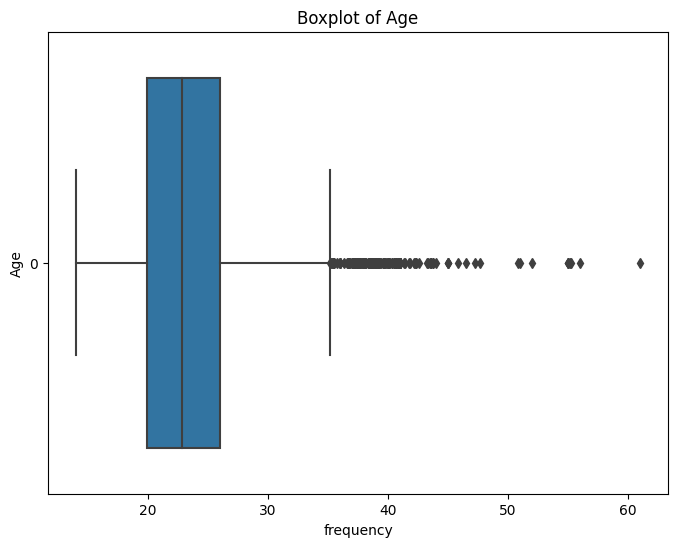

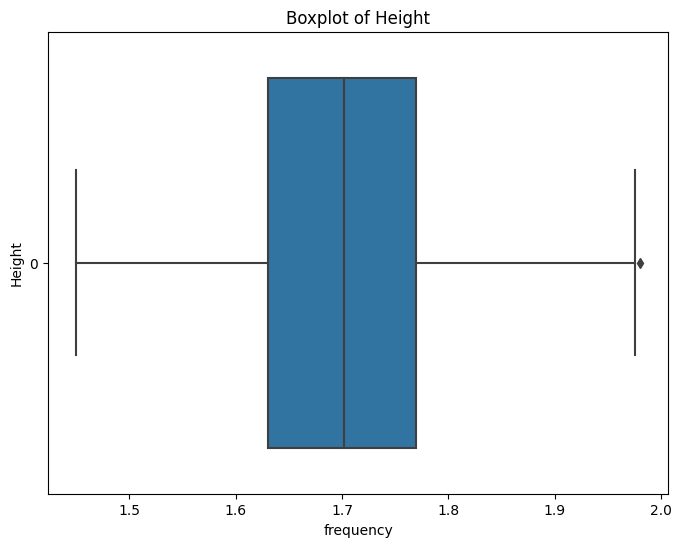

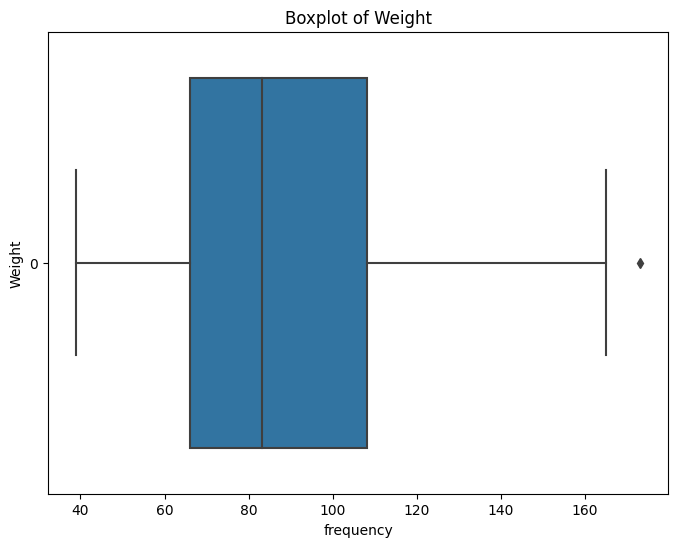

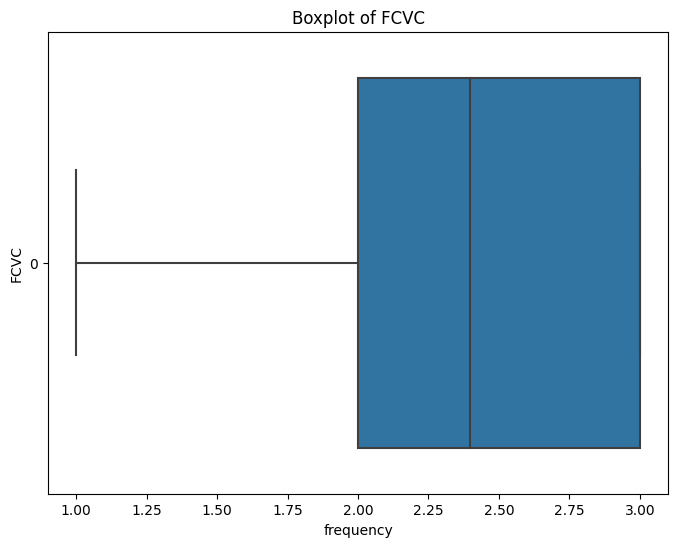

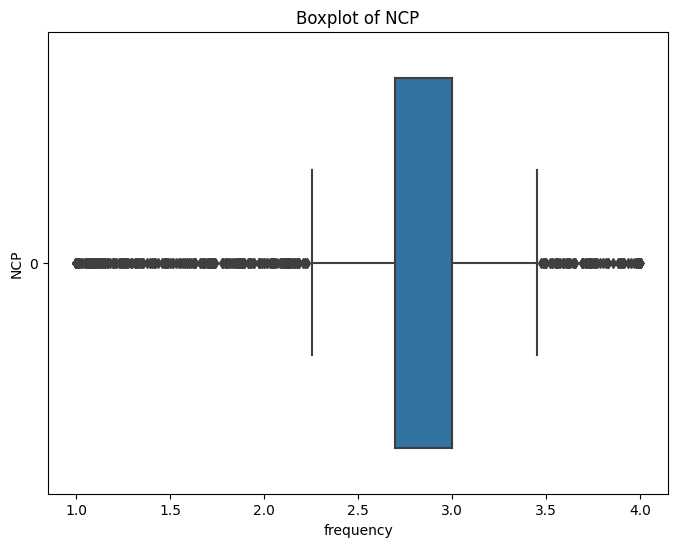

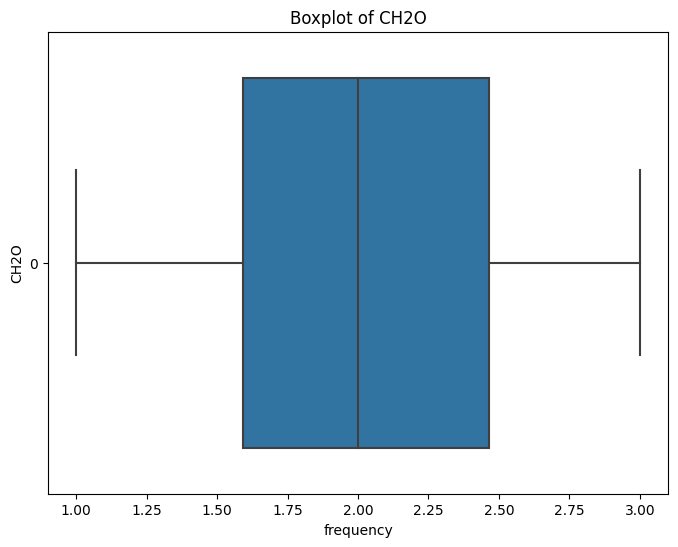

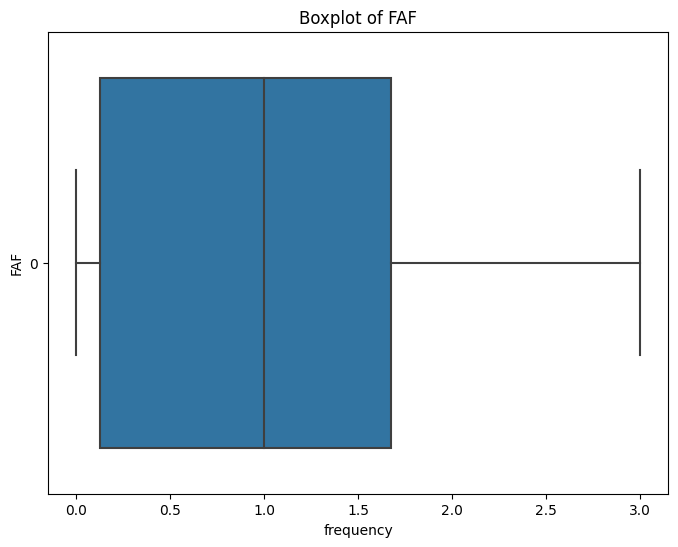

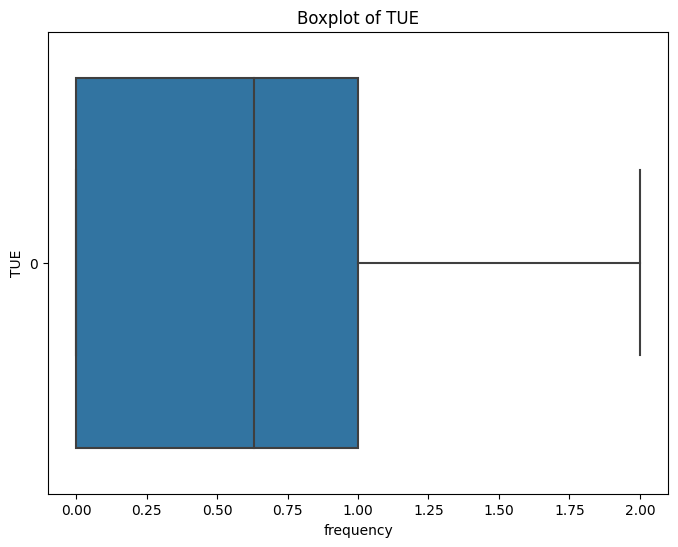

In [15]:
numeric_cols = df.select_dtypes(include = ["float64"])

for col in numeric_cols.columns : 
    plt.figure(figsize=(8,6))
    sns.boxplot(data = df[col] , orient = "h")
    plt.ylabel(col)
    plt.xlabel("frequency")
    plt.title(f"Boxplot of {col}")

In [16]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history', 'FAVC', 'FCVC',
       'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS',
       'Obesity'],
      dtype='object')

In [17]:
from collections import Counter

def outlierDetect(df, ozellik=["Age", "Height", "Height","NCP"]):
    outlier_indices = []
    
    for c in ozellik:
        if c in df.columns and np.issubdtype(df[c].dtype, np.number):
            q1 = np.percentile(df[c].dropna(), 25)
        
            q3 = np.percentile(df[c].dropna(), 75)
    
            iqr = q3 - q1
        
            outlier_step = 1.5 * iqr
            üst_sinir = q3 + outlier_step
            alt_sinir = q1 - outlier_step
        
            outlier_col_list = df[(df[c] < alt_sinir) | (df[c] > üst_sinir)].index
            outlier_indices.extend(outlier_col_list)

    outlier_indices = Counter(outlier_indices)
    
    outliers = list(i for i, v in outlier_indices.items() if v > 1)
    
    return outliers

In [18]:
df_outlier = df.loc[outlierDetect(df, ["Age", "Height", "Height","NCP"])]

In [19]:
outlier_obesity = df_outlier.Obesity.value_counts()

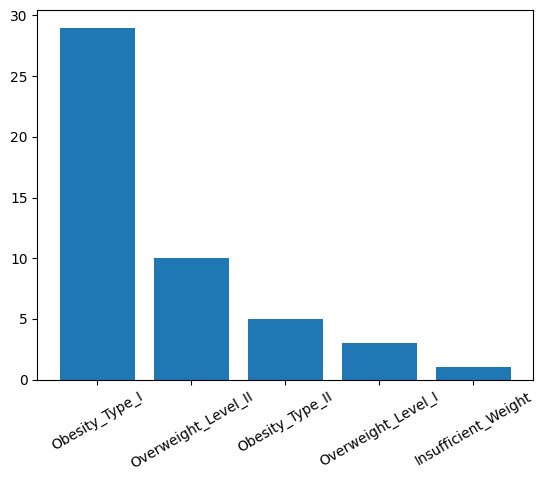

In [20]:
plt.figure()
plt.bar(outlier_obesity.index, outlier_obesity.values)
plt.xticks(rotation=30)
plt.show()

In [21]:
outlier_index_list = df_outlier.index.tolist()
df_cleaned = df.drop(index=outlier_index_list)

In [22]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2039 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          2039 non-null   object 
 1   Age             2039 non-null   float64
 2   Height          2039 non-null   float64
 3   Weight          2039 non-null   float64
 4   family_history  2039 non-null   object 
 5   FAVC            2039 non-null   object 
 6   FCVC            2039 non-null   float64
 7   NCP             2039 non-null   float64
 8   CAEC            2039 non-null   object 
 9   SMOKE           2039 non-null   object 
 10  CH2O            2039 non-null   float64
 11  SCC             2039 non-null   object 
 12  FAF             2039 non-null   float64
 13  TUE             2039 non-null   float64
 14  CALC            2039 non-null   object 
 15  MTRANS          2039 non-null   object 
 16  Obesity         2039 non-null   object 
dtypes: float64(8), object(9)
memory usage:

In [23]:
df_cleaned["bmi"] = df_cleaned["Weight"] / (df_cleaned["Height"] ** 2)
df_cleaned.head()

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity,bmi
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight,24.386526
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,24.238227
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,23.765432
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I,26.851852
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,28.342381


In [24]:
df_cleaned = df_cleaned.drop(["Weight", "Height"], axis=1)

In [25]:
df_cleaned.head()

,Gender,Age,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity,bmi
0,Female,21.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight,24.386526
1,Female,21.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,24.238227
2,Male,23.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,23.765432
3,Male,27.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I,26.851852
4,Male,22.0,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,28.342381


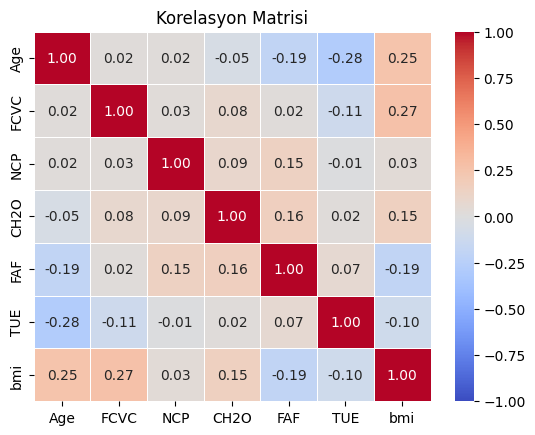

In [26]:
corr_matrix = df_cleaned.select_dtypes(include=["float64"]).corr()

sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".2f", vmin=-1, vmax=1, linewidths=0.5)
plt.title("Korelasyon Matrisi")
plt.show()

In [27]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA

In [28]:
X = df_cleaned.drop(["Obesity"],axis=1)
y = df_cleaned["Obesity"]

In [29]:
X = pd.get_dummies(X , drop_first = True )

In [30]:
X

,Age,FCVC,NCP,CH2O,FAF,TUE,bmi,Gender_Male,family_history_yes,FAVC_yes,...,CAEC_no,SMOKE_yes,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21.000000,2.0,3.0,2.000000,0.000000,1.000000,24.386526,False,True,False,...,False,False,False,False,False,True,False,False,True,False
1,21.000000,3.0,3.0,3.000000,3.000000,0.000000,24.238227,False,True,False,...,False,True,True,False,True,False,False,False,True,False
2,23.000000,2.0,3.0,2.000000,2.000000,1.000000,23.765432,True,True,False,...,False,False,False,True,False,False,False,False,True,False
3,27.000000,3.0,3.0,2.000000,2.000000,0.000000,26.851852,True,False,False,...,False,False,False,True,False,False,False,False,False,True
4,22.000000,2.0,1.0,2.000000,0.000000,0.000000,28.342381,True,False,False,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,3.0,3.0,1.728139,1.676269,0.906247,44.901475,False,True,True,...,False,False,False,False,True,False,False,False,True,False
2107,21.982942,3.0,3.0,2.005130,1.341390,0.599270,43.741923,False,True,True,...,False,False,False,False,True,False,False,False,True,False
2108,22.524036,3.0,3.0,2.054193,1.414209,0.646288,43.543817,False,True,True,...,False,False,False,False,True,False,False,False,True,False
2109,24.361936,3.0,3.0,2.852339,1.139107,0.586035,44.071535,False,True,True,...,False,False,False,False,True,False,False,False,True,False


In [31]:
X_train , X_test , y_train , y_test = train_test_split(X,y , test_size = 0.25 , random_state = 1)

In [32]:
scaler = StandardScaler()

In [33]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [34]:
tree_clf = DecisionTreeClassifier(criterion="gini", max_depth=7, max_leaf_nodes=None)
tree_clf.fit(X_train, y_train)
y_pred_tree_clf = tree_clf.predict(X_test)
tree_clf_accuracy = accuracy_score(y_test, y_pred_tree_clf)
print(f"Decision Tree Accuracy: {tree_clf_accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_tree_clf))

Decision Tree Accuracy: 0.9725

Classification Report:
                      precision    recall  f1-score   support

Insufficient_Weight       1.00      0.98      0.99        61
      Normal_Weight       0.96      0.99      0.97        71
     Obesity_Type_I       0.96      0.95      0.96        83
    Obesity_Type_II       0.96      0.98      0.97        66
   Obesity_Type_III       1.00      0.99      0.99        84
 Overweight_Level_I       0.95      0.95      0.95        66
Overweight_Level_II       0.97      0.96      0.97        79

           accuracy                           0.97       510
          macro avg       0.97      0.97      0.97       510
       weighted avg       0.97      0.97      0.97       510



In [35]:
from sklearn.model_selection import GridSearchCV

tree_param_grid = {
    "max_depth": [3, 5, 7],
    "max_leaf_nodes": [None, 5, 10, 20, 30, 50],
    "criterion" : ["gini","entropy"]
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=1), tree_param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'criterion': 'entropy', 'max_depth': 7, 'max_leaf_nodes': None}


In [36]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators = 100)
rf_clf.fit(X_train , y_train)
y_pred_rf_clf = rf_clf.predict(X_test)
rf_clf_accuracy = accuracy_score(y_pred_rf_clf , y_test)
print(f"rf accuracy : {rf_clf_accuracy}")
print(classification_report(y_pred_rf_clf,y_test))

rf accuracy : 0.9627450980392157
                     precision    recall  f1-score   support

Insufficient_Weight       0.97      1.00      0.98        59
      Normal_Weight       1.00      0.85      0.92        84
     Obesity_Type_I       0.96      1.00      0.98        80
    Obesity_Type_II       1.00      0.97      0.99        68
   Obesity_Type_III       1.00      1.00      1.00        84
 Overweight_Level_I       0.94      0.95      0.95        65
Overweight_Level_II       0.87      0.99      0.93        70

           accuracy                           0.96       510
          macro avg       0.96      0.97      0.96       510
       weighted avg       0.97      0.96      0.96       510



In [37]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
log_reg_accuracy = accuracy_score(y_pred_log_reg, y_test)
print(f"log_reg accuracy: {log_reg_accuracy}")
print(classification_report(y_pred_log_reg, y_test))

log_reg accuracy: 0.692156862745098
                     precision    recall  f1-score   support

Insufficient_Weight       0.95      0.74      0.83        78
      Normal_Weight       0.48      0.65      0.55        52
     Obesity_Type_I       0.59      0.60      0.59        82
    Obesity_Type_II       0.85      0.68      0.76        82
   Obesity_Type_III       0.99      0.98      0.98        85
 Overweight_Level_I       0.47      0.50      0.48        62
Overweight_Level_II       0.53      0.61      0.57        69

           accuracy                           0.69       510
          macro avg       0.69      0.68      0.68       510
       weighted avg       0.72      0.69      0.70       510



In [38]:
pca = PCA(n_components = 2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
rf_pca = RandomForestClassifier(n_estimators = 100)
rf_pca.fit(X_train_pca , y_train)
y_pred_pca = rf_pca.predict(X_test_pca)
accuracy_rf_pca = accuracy_score(y_pred_pca , y_test)
print(f"accuracy_rf_pca : {accuracy_rf_pca }")

classification_report_after_pca = classification_report(y_pred_pca,y_test)
print(f" {classification_report_after_pca}")

accuracy_rf_pca : 0.6588235294117647
                      precision    recall  f1-score   support

Insufficient_Weight       0.70      0.63      0.67        68
      Normal_Weight       0.55      0.49      0.52        80
     Obesity_Type_I       0.51      0.61      0.55        69
    Obesity_Type_II       0.89      0.75      0.81        79
   Obesity_Type_III       0.99      1.00      0.99        83
 Overweight_Level_I       0.53      0.53      0.53        66
Overweight_Level_II       0.44      0.54      0.49        65

           accuracy                           0.66       510
          macro avg       0.66      0.65      0.65       510
       weighted avg       0.67      0.66      0.66       510



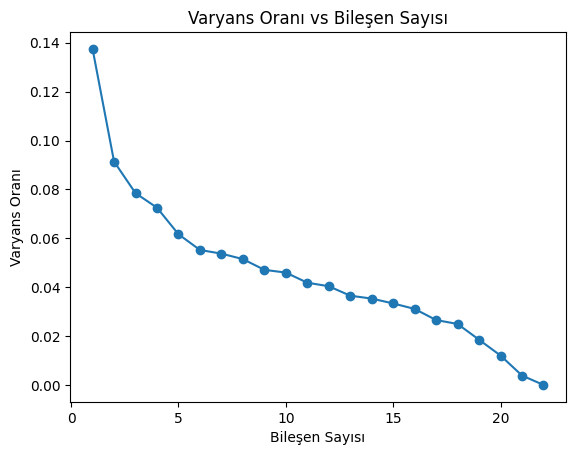

In [39]:
pca = PCA()
pca.fit(X_train_scaled)

plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
plt.xlabel('Bileşen Sayısı')
plt.ylabel('Varyans Oranı')
plt.title('Varyans Oranı vs Bileşen Sayısı')
plt.show()